In [1]:
import pystan
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt

import orbit
from orbit.utils.stan import compile_stan_model_simplified, get_compiled_stan_model_simplified
from orbit.utils.dataset import load_m3monthly

In [2]:
multiprocessing.set_start_method("fork", force=True)

In [3]:
stan_model_path = "./stan/ss_local_level.stan"
compiled_path = compile_stan_model_simplified("./stan/ss_local_level.stan")
stan_mod = get_compiled_stan_model_simplified(compiled_path)

In [4]:
data = load_m3monthly()

In [5]:
y = data.loc[data['key'] == 'N1402', 'value'].values
y = (y - np.mean(y)) / np.std(y)
y

array([-0.28426165, -0.28426165, -0.5344855 ,  0.52896586,  0.09107412,
       -0.40937358,  0.21618605, -0.65959743,  0.52896586,  0.71663375,
       -1.41026898,  0.27874201,  1.27963741, -0.15914973, -0.72215339,
       -0.0340378 , -0.40937358, -0.34681761,  3.03120435, -0.28426165,
       -0.0340378 , -0.15914973,  2.90609243,  1.02941356, -0.5344855 ,
        2.65586858,  0.90430163, -0.0340378 ,  1.78008511,  0.4664099 ,
        1.40474933, -0.78470935,  1.84264107, -0.59704146,  1.71752914,
       -0.65959743,  0.21618605, -0.59704146, -0.22170569,  0.34129797,
       -1.16004513, -0.47192954, -0.97237724, -0.5344855 ,  0.84174567,
       -0.09659377, -0.0340378 ,  1.40474933, -0.28426165, -0.40937358,
       -0.47192954, -1.41026898,  0.96685759, -0.65959743, -1.22260109,
       -0.34681761, -0.84726531, -0.90982128, -1.5353809 , -0.72215339,
        0.77918971, -0.72215339, -0.78470935,  0.27874201, -0.5344855 ,
       -1.41026898, -0.59704146, -0.90982128])

In [6]:
np.std(y) ** 2

1.0

In [7]:
input = {
    'N' : len(y),
    'Y' : y,
    'SD_Y' : 1.0,
    'A1' : 0.0,
    'P1' : 1.0,
    'state_sigma_mean': 0.01,
    'state_sigma_sd': 0.1,
    'obs_sigma_mean': 0.1,
    'obs_sigma_sd': 1.0,
}

In [8]:
results = stan_mod.sampling(
    data=input,
    warmup=4000,
    iter=8000,
)


Gradient evaluation took 4.4e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.44 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 4.7e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.47 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 8000 [  0%]  (Warmup)

Gradient evaluation took 4.5e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.45 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 3.3e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.33 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 8000 [  0%]  (Warmup)
Exception initializing step size.
Posterior is improper. Please check your model.
Exception initializing step size.
Posterior is improper. Please check your model.
Iteration:  800 / 8000 [ 10%]  (Warmup)
Iteration:  800 / 8000 [ 10%]  (Warmup)
Iteration: 1600 / 8000 [

/Users/towinazure/opt/miniconda3/envs/ts/lib/python3.8/site-packages/pystan/diagnostics.py:217: RuntimeWarning: invalid value encountered in true_divide
  e_bfmi = numer / denom


Iteration: 8000 / 8000 [100%]  (Sampling)

 Elapsed Time: 0.555717 seconds (Warm-up)
               1.1717 seconds (Sampling)
               1.72741 seconds (Total)



In [9]:
posteriors = results.extract(permuted=True)
states_mean = posteriors['a']
states_mean = np.mean(states_mean, 0)

In [10]:
states_mean.shape

(69,)

In [11]:
y.shape

(68,)

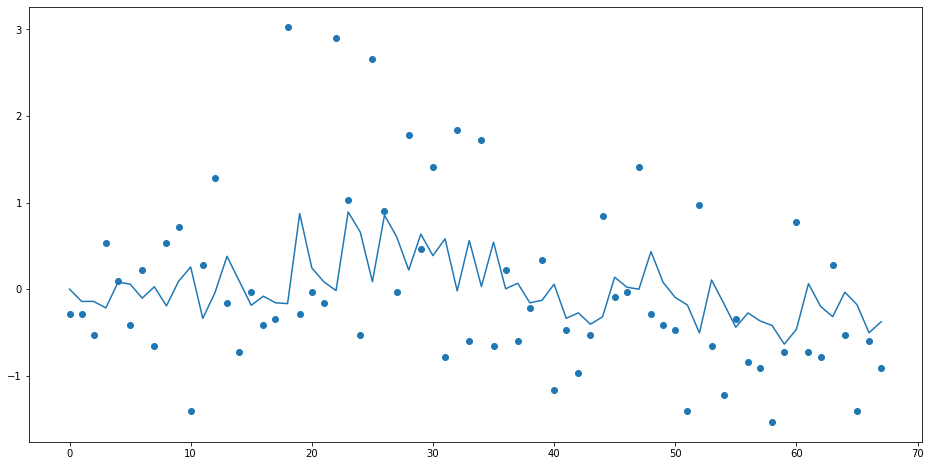

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
x = np.arange(0, len(y))
ax.scatter(x, y)
ax.plot(x, states_mean[:-1])